In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("climate_nasa.csv")

In [3]:
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [5]:
df.describe

<bound method NDFrame.describe of                          date  likesCount  \
0    2022-09-07T17:12:32.000Z           2   
1    2022-09-08T14:51:13.000Z           0   
2    2022-09-07T17:19:41.000Z           1   
3    2022-09-08T00:51:30.000Z           4   
4    2022-09-07T19:06:20.000Z          16   
..                        ...         ...   
517  2022-12-22T17:21:37.000Z           0   
518  2022-12-22T17:19:51.000Z           1   
519  2022-12-22T17:12:57.000Z           3   
520  2022-12-22T17:01:12.000Z           1   
521  2022-12-22T17:00:08.000Z          12   

                                           profileName  commentsCount  \
0    4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1    518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2    d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3    37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4    e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...      

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
likesCount,522.0,4.720307,12.053556,0.0,0.0,1.0,4.0,126.0
commentsCount,244.0,8.696721,12.266176,1.0,2.0,5.0,10.0,93.0


In [7]:
df.shape

(522, 5)

In [8]:
df.info

<bound method DataFrame.info of                          date  likesCount  \
0    2022-09-07T17:12:32.000Z           2   
1    2022-09-08T14:51:13.000Z           0   
2    2022-09-07T17:19:41.000Z           1   
3    2022-09-08T00:51:30.000Z           4   
4    2022-09-07T19:06:20.000Z          16   
..                        ...         ...   
517  2022-12-22T17:21:37.000Z           0   
518  2022-12-22T17:19:51.000Z           1   
519  2022-12-22T17:12:57.000Z           3   
520  2022-12-22T17:01:12.000Z           1   
521  2022-12-22T17:00:08.000Z          12   

                                           profileName  commentsCount  \
0    4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1    518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2    d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3    37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4    e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...        

In [9]:
df.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Clean text
import re
df['clean_text'] = df['text'].astype(str).apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x.lower()))

# Load transformer model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment pipeline
sentiment_pipe = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Apply sentiment analysis (only first 512 tokens per comment)
df['transformer_sentiment'] = df['clean_text'].apply(lambda x: sentiment_pipe(x[:512])[0]['label'])

# Save output
df.to_csv("nasa_sentiment_output.csv", index=False)


Device set to use cpu


In [15]:
#Type 2

2025-07-04 00:48:07,329 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2025-07-04 00:48:41,996 - BERTopic - Embedding - Completed ✓
2025-07-04 00:48:41,996 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-04 00:48:54,924 - BERTopic - Dimensionality - Completed ✓
2025-07-04 00:48:54,940 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-04 00:48:54,984 - BERTopic - Cluster - Completed ✓
2025-07-04 00:48:54,996 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-04 00:48:55,050 - BERTopic - Representation - Completed ✓


   Topic  Count                              Name  \
0     -1      3  -1_loess_spelled_mendozaa_heiker   
1      0    420                   0_the_to_of_and   
2      1     36           1_bs_thanks_ord_sharing   
3      2     19       2_silva_andy_schulz_edgardo   
4      3     19                 3_nan_hc_genesis_   

                                      Representation  \
0  [loess, spelled, mendozaa, heiker, heavy, amer...   
1      [the, to, of, and, is, in, that, we, it, are]   
2  [bs, thanks, ord, sharing, jusst, jess, oooooo...   
3  [silva, andy, schulz, edgardo, meziah, kevin, ...   
4                   [nan, hc, genesis, , , , , , , ]   

                                 Representative_Docs  
0  [heavy rain heiker mendozaa, link doesnt seem ...  
1  [you are being gaslighted have any of you hear...  
2        [bs, bs, re ord being from  somethinglolol]  
3  [ruth crowl frank bulbeck wow, john kerry to t...  
4                                    [nan, nan, nan]  
[('the', 0.073

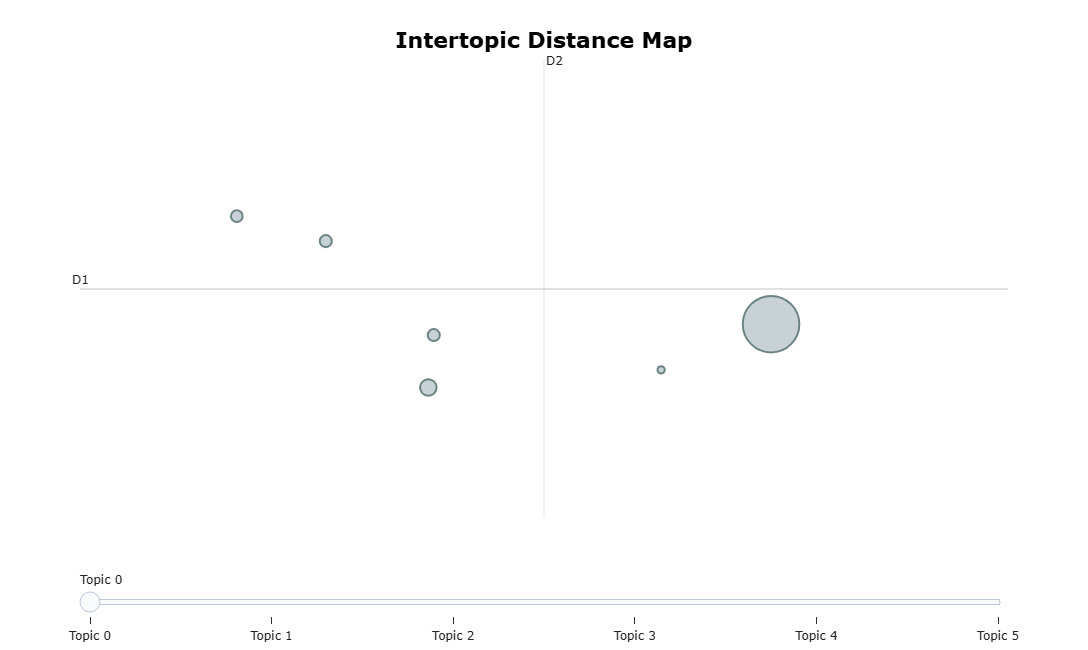

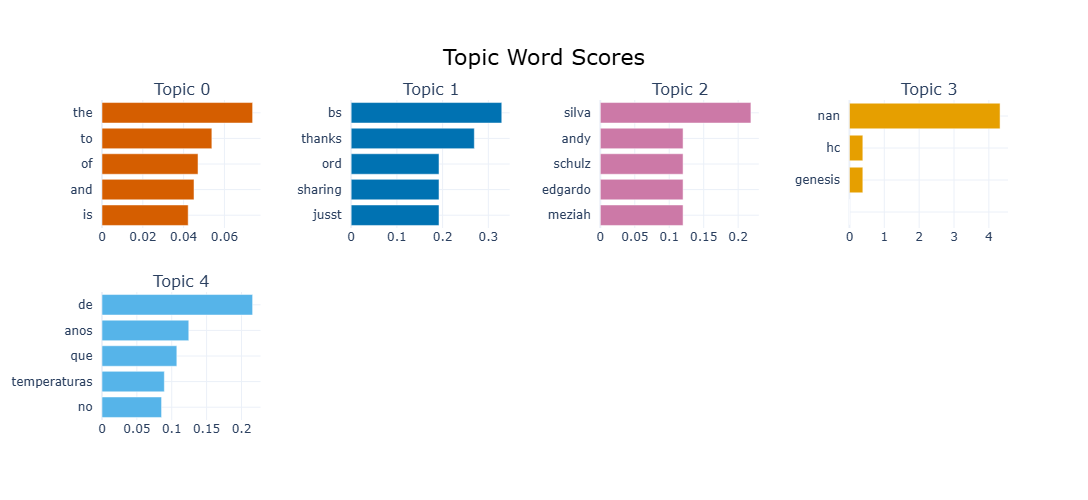

In [11]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load and clean dataset
df = pd.read_csv("climate_nasa.csv")
df['text'] = df['text'].astype(str)
df['clean_text'] = df['text'].str.replace(r"[^a-zA-Z\s]", "", regex=True).str.lower()

# Create BERTopic model
topic_model = BERTopic(language="english", min_topic_size=5, verbose=True)

# Fit model
topics, probs = topic_model.fit_transform(df['clean_text'])

# Add topic results to DataFrame
df['topic'] = topics
df['topic_prob'] = probs

# View top 5 topics
print(topic_model.get_topic_info().head())

# View keywords of topic 0 (example)
print(topic_model.get_topic(0))

# Optional: Visualize
topic_model.visualize_topics().show()
topic_model.visualize_barchart(top_n_topics=5).show()

# Save results
df.to_csv("nasa_topic_output_2.csv", index=False)


2025-07-04 00:56:24,007 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2025-07-04 00:56:34,716 - BERTopic - Embedding - Completed ✓
2025-07-04 00:56:34,716 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-04 00:56:35,852 - BERTopic - Dimensionality - Completed ✓
2025-07-04 00:56:35,867 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-04 00:56:35,887 - BERTopic - Cluster - Completed ✓
2025-07-04 00:56:35,887 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-04 00:56:35,920 - BERTopic - Representation - Completed ✓


   Topic  Count                           Name  \
0      0    433                0_the_to_of_and   
1      1     19  1_silva_american_sergio_kerry   
2      2     18               2_de_anos_que_no   

                                      Representation  \
0      [the, to, of, and, is, in, that, we, it, are]   
1  [silva, american, sergio, kerry, loess, lugo, ...   
2  [de, anos, que, no, temperaturas, as, dos, pla...   

                                 Representative_Docs  
0  [you know how people say the earths climate ha...  
1  [john kerry to the rescue with his private jet...  
2  [es triste todo lo que esta pasando todo se de...  
[('the', 0.11225730979051786), ('to', 0.07650841057184217), ('of', 0.06490840306047864), ('and', 0.06186810413560942), ('is', 0.05730701445026183), ('in', 0.05390883380479747), ('that', 0.042975347747710335), ('we', 0.041341312507982245), ('it', 0.03645856018082219), ('are', 0.03369421060148448)]


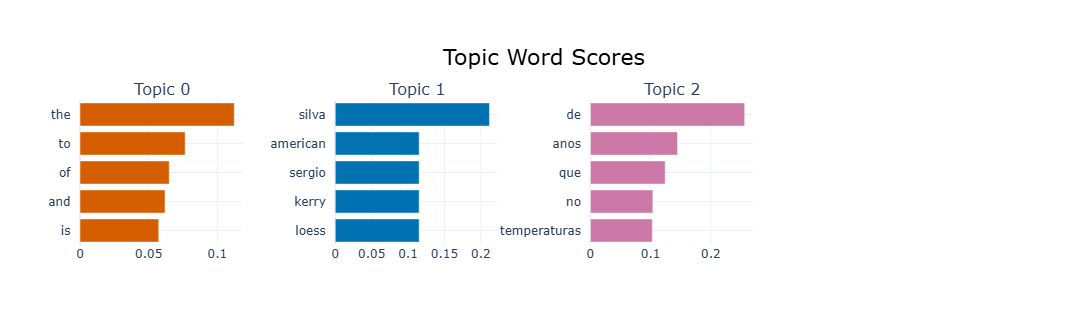

In [15]:
from bertopic import BERTopic
import pandas as pd
import re

# Load your sentiment-annotated CSV
df = pd.read_csv("nasa_sentiment_output.csv")

# Clean the text (if not already cleaned)
df['clean_text'] = df['text'].astype(str).apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x.lower()))

# Drop empty or short rows
df = df[df['clean_text'].str.strip().str.len() > 10]

# Fit BERTopic
topic_model = BERTopic(language="english", verbose=True, min_topic_size=5)
topics, probs = topic_model.fit_transform(df['clean_text'])

# Add topic info back to DataFrame
df['topic'] = topics
df['topic_prob'] = probs

# Save topic data
df.to_csv("nasa_topic_output.csv", index=False)

# Show summary of topics
print(topic_model.get_topic_info().head())

# Optional: Explore top words of a specific topic
print(topic_model.get_topic(0))  # Example: topic 0

# Optional: Visualize topics (interactive)
topic_model.visualize_barchart(top_n_topics=3).show()


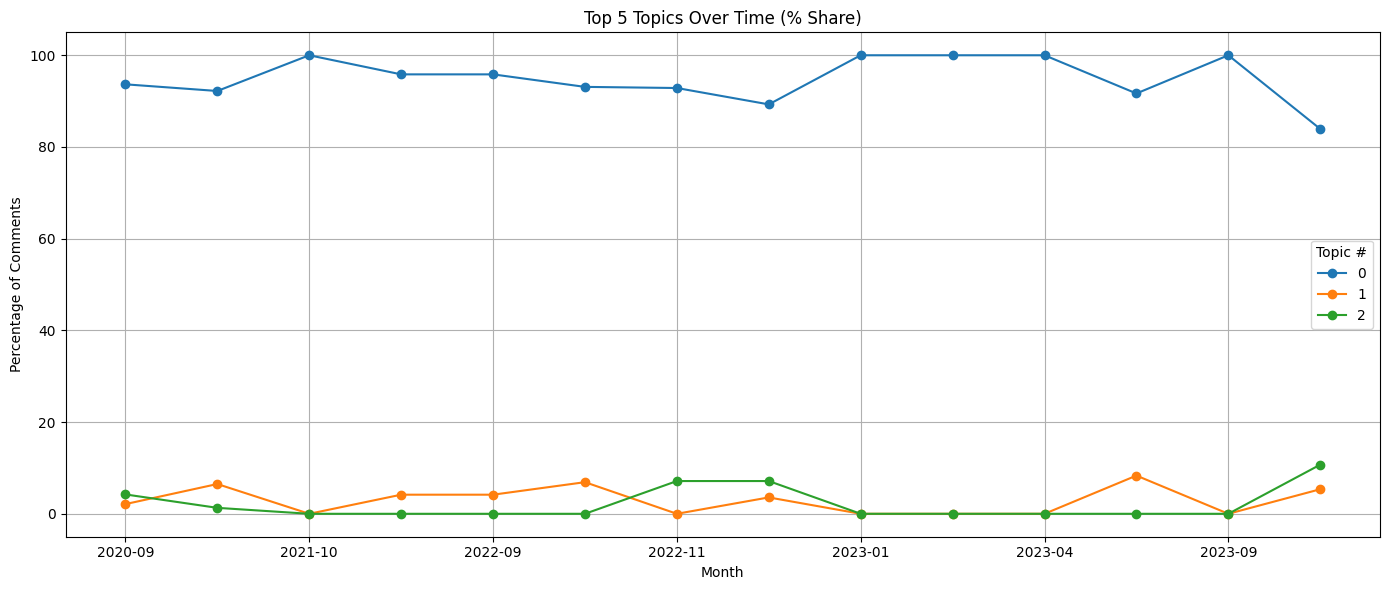

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load topic data (your output from BERTopic)
df = pd.read_csv("nasa_topic_output.csv")

# Ensure date is parsed
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month and year for grouping
df['month'] = df['date'].dt.to_period("M").astype(str)

# Count topics per month
topic_trend = df.groupby(['month', 'topic']).size().reset_index(name='count')

# Pivot for plotting
pivot_df = topic_trend.pivot(index='month', columns='topic', values='count').fillna(0)

# Normalize to % share of each topic per month
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot top 5 trending topics over time
top_topics = pivot_df.sum().sort_values(ascending=False).head(5).index
pivot_df_percent[top_topics].plot(figsize=(14, 6), marker='o')
plt.title("Top 5 Topics Over Time (% Share)")
plt.xlabel("Month")
plt.ylabel("Percentage of Comments")
plt.legend(title="Topic #")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Filter before grouping
df_pos = df[df['transformer_sentiment'] == 'positive']
df_neg = df[df['transformer_sentiment'] == 'negative']


In [19]:
df.head()

,date,likesCount,profileName,commentsCount,text,clean_text,topic,topic_prob,transformer_sentiment,month
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,neat comparison i have not heard it before\n i...,0,1.00000,LABEL_1,2022-09
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...,an excellent way to visualise the invisible th...,0,1.00000,LABEL_2,2022-09
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,does the coghg in the troposphere affect the s...,0,1.00000,LABEL_1,2022-09
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...,excellent post i defo feel the difference one...,0,1.00000,LABEL_2,2022-09
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",yes and carbon dioxide does not harm the earth...,0,0.96173,LABEL_0,2022-09


In [20]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", min_topic_size=5)
topics, probs = topic_model.fit_transform(df['clean_text'])


In [21]:
topic_model.save("model/topic_model.bin")


2025-07-04 01:09:06,828 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


FileNotFoundError: [Errno 2] No such file or directory: 'model/topic_model.bin'

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

In [24]:
df = pd.read_csv("nasa_sentiment_output.csv")

In [25]:
df.head()

,date,likesCount,profileName,commentsCount,text,clean_text,topic,topic_prob,transformer_sentiment
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,neat comparison i have not heard it before\n i...,0,1.0,LABEL_1
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...,an excellent way to visualise the invisible th...,0,1.0,LABEL_2
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,does the coghg in the troposphere affect the s...,0,1.0,LABEL_1
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...,excellent post i defo feel the difference one...,0,1.0,LABEL_2
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",yes and carbon dioxide does not harm the earth...,0,1.0,LABEL_0


In [26]:
df.isnull().sum()

date                       0
likesCount                 0
profileName                0
commentsCount            278
text                      18
clean_text                29
topic                      0
topic_prob                 0
transformer_sentiment      0
dtype: int64

In [28]:
df.shape

(522, 9)

In [29]:
df=df.dropna()

In [30]:
df.shape

(241, 9)

In [31]:
df.isnull().sum()

date                     0
likesCount               0
profileName              0
commentsCount            0
text                     0
clean_text               0
topic                    0
topic_prob               0
transformer_sentiment    0
dtype: int64

In [32]:
# Vectorize
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])

In [33]:

# Cluster into topics
kmeans = KMeans(n_clusters=5, random_state=42)
df['topic'] = kmeans.fit_predict(X)

  File "D:\XAI\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Venkatesh\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Venkatesh\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Venkatesh\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [34]:
# Top words per topic
def get_top_words(model, vectorizer, n_words=10):
    terms = vectorizer.get_feature_names_out()
    return {
        i: [terms[ind] for ind in model.cluster_centers_[i].argsort()[-n_words:][::-1]]
        for i in range(model.n_clusters)
    }

top_words = get_top_words(kmeans, vectorizer)


In [35]:
top_words

{0: ['climate',
  'change',
  'dont',
  'think',
  'understand',
  'nasa',
  'agree',
  'data',
  'people',
  'real'],
 1: ['temperature',
  'time',
  'years',
  'graph',
  'year',
  'global',
  'planet',
  'earth',
  'difference',
  'reason'],
 2: ['nasa',
  'science',
  'good',
  'say',
  'like',
  'years',
  'bye',
  'im',
  'climate',
  'change'],
 3: ['global',
  'warming',
  'earth',
  'happened',
  'years',
  'people',
  'weather',
  'ice',
  'hemisphere',
  'start'],
 4: ['data',
  'make',
  'post',
  'historical',
  'terms',
  'years',
  'interesting',
  'map',
  'trying',
  'nasa']}